In [1]:
%pylab inline
import ROOT
import root_numpy
import pandas as pd
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyAmsUtils import tree_to_frame

In [4]:
#tfiles = [ROOT.TFile("/data/deuteronMC.ntuple{0}.root".format(i)) for i in range(1,4)]
#filenames =glob.glob("/data/13*.root")
filenames = ["/root/AMSDeutons/test.root"]

In [5]:
def get_frame(f):
    tfile = ROOT.TFile(f)
    tree  = tfile.Get("selections")
    return tree_to_frame(tree) 
    
data = pd.concat([get_frame(f) for f in filenames])

In [7]:
data

,Run,Event,UTime,JMDCTime,ThetaS,PhiS,Livetime,Latitude,Rcutoff,PhysBPatt,fStatus,selStatus
0,1385848665,1,1385848664,1.385849e+09,-0.001460,2.496479,0.000000,0.175892,-19.152969,16,1161981584252214605,354367
1,1385848665,2,1385848664,1.385849e+09,-0.001462,2.496480,0.000000,0.175894,16.415506,18,2000355996379331965,1070596095
2,1385848665,3,1385848664,1.385849e+09,-0.001462,2.496480,0.000000,0.175894,15.157396,2,1900554802857784605,523775
3,1385848665,4,1385848664,1.385849e+09,-0.001463,2.496481,0.001076,0.175895,13.885883,48,1724914074332051805,523135
4,1385848665,5,1385848664,1.385849e+09,-0.001464,2.496482,0.002152,0.175896,12.109298,2,1279057607872486409,477247
5,1385848665,6,1385848664,1.385849e+09,-0.001467,2.496484,0.005379,0.175899,-57.330326,16,9755834741498576506,365836735
6,1385848665,7,1385848664,1.385849e+09,-0.001469,2.496485,0.007531,0.175901,17.588358,4,1288064807670390537,485439
7,1385848665,8,1385848664,1.385849e+09,-0.001470,2.496485,0.008607,0.175902,10.013870,32,117129041047457865,477199
8,1385848665,9,1385848664,1.385849e+09,-0.001470,2.496486,0.009683,0.175902,25.913233,2,1161964017560852749,485439
9,1385848665,10,1385848664,1.385849e+09,-0.001471,2.496487,0.010759,0.175903,14.398962,2,1288064807395703053,635436287


In [9]:
pattcounts = data['PhysBPatt'].map(lambda x:np.binary_repr(x,8)).value_counts()

# Counts (linear scale)

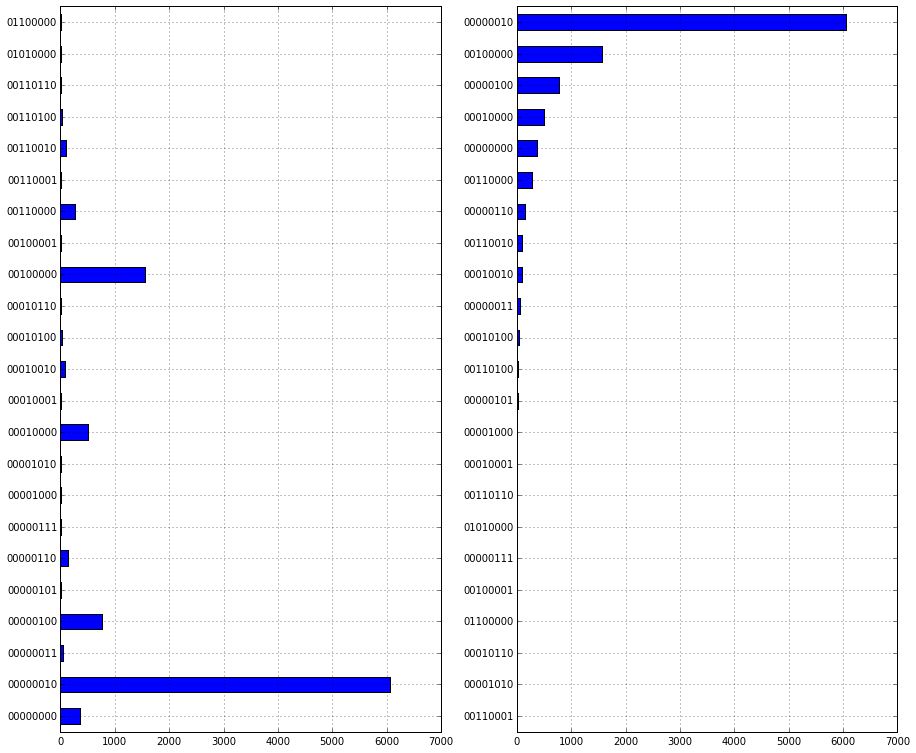

In [10]:
figsize(15,13)
subplot(121);pattcounts.sort_index().plot(kind='barh')
subplot(122);pattcounts.sort(ascending=True); pattcounts.plot(kind='barh')

#Counts (Log scale)

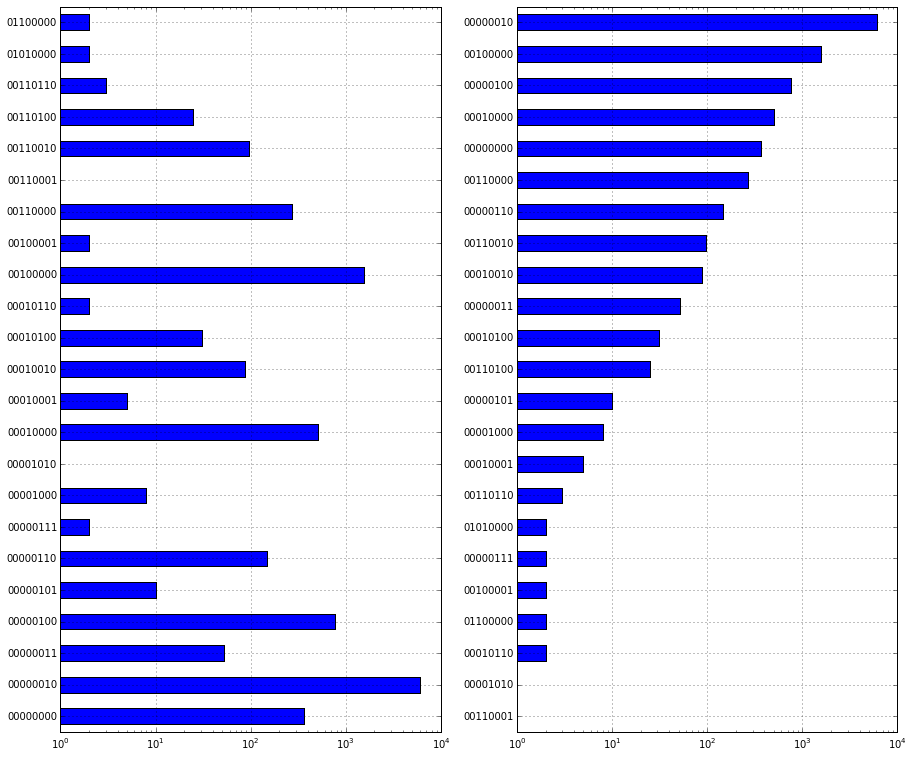

In [11]:
figsize(15,13)
subplot(121);pattcounts.sort_index().plot(kind='barh', logx=True)
subplot(122);pattcounts.sort(ascending=True); pattcounts.plot(kind='barh', logx=True)